## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Loading the DataSet

In [2]:
dataframe = pd.read_csv("Churn_Modelling.csv")
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dropping the columns RowNumber, CustomerId and Surname as they don't play any role in predicting 

In [3]:
df = dataframe.drop(columns = ["RowNumber", "CustomerId", "Surname"])

## Seperating the Value we want to predict
- Setting all the other attributes a X Input
- Exited a Y because we wan't to predict if a customer will exit in the coming days or not

## One Hot Encoding
- The data categorical value are no good to machine so we label it a numbers
- But giving them numbers makes some high priority and other low without any reason
- So we one hot encode them creating seperating columns
- like gender_male a column and gender_female another

In [4]:
df_X = df[df.columns.difference(['Exited'])]
df_Y = df["Exited"]
dummies = pd.get_dummies(df_X[['Geography', 'Gender']])
df_X = df.drop(columns = ['Geography', 'Gender'])
df_X = pd.concat([df_X, dummies], axis = 1)
display(df_X.head())
display(df_Y.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Standard Scaling then so that all the attributes will have equal weights at input

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_X = scaler.fit_transform(df_X)
df_X = pd.DataFrame(df_X)

## Splitting them to Train and Test data
- Test data is never shown to model except at last so that the real accuracy can be measured

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size = 0.2, random_state = 7)

## Building a neural network

In [7]:
import keras
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
classifier = Sequential()
classifier.add(Dense(output_dim = 6, init = "uniform", activation = 'relu', input_dim = 14))
classifier.add(Dense(output_dim = 6, init = "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 1, init = "uniform", activation = "sigmoid"))

## Compiling the network with optimizers and loss

In [9]:
classifier.compile(optimizer = keras.optimizers.Adam(lr = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

## Fitting the model with back propagation

In [10]:
classifier.fit(x = X_train, y = Y_train, epochs = 5, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/5
6400/6400 [==============================] - 1s 112us/step - loss: 0.5982 - acc: 0.7952 - val_loss: 0.4069 - val_acc: 0.7894
Epoch 2/5
6400/6400 [==============================] - 0s 44us/step - loss: 0.2720 - acc: 0.7986 - val_loss: 0.1902 - val_acc: 0.7894
Epoch 3/5
6400/6400 [==============================] - 0s 47us/step - loss: 0.1346 - acc: 0.9641 - val_loss: 0.1033 - val_acc: 1.0000
Epoch 4/5
6400/6400 [==============================] - 0s 42us/step - loss: 0.0783 - acc: 1.0000 - val_loss: 0.0632 - val_acc: 1.0000
Epoch 5/5
6400/6400 [==============================] - 0s 53us/step - loss: 0.0481 - acc: 1.0000 - val_loss: 0.0392 - val_acc: 1.0000


## Checking the model accuracy

In [13]:
def classification_metrics(actual, pred, msg):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(actual, pred)

    plt.figure()
    ax= plt.subplot()
    sns.heatmap(cm, annot = True, fmt = 'g')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['active', 'terminated']) 
    ax.yaxis.set_ticklabels(['active', 'terminated'])   
    plt.show()       
    sensitivity = cm[1][1]/(cm[1][0] + cm[1][1])
    specifity = cm[0][0]/(cm[0][0] + cm[0][1])
    accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
    
    print(msg, '\n')
    print('accuracy:    ', round(accuracy,2), 
      '\nsensitivity: ', round(sensitivity,2), 
      '\nspecifity:   ', round(specifity,2))

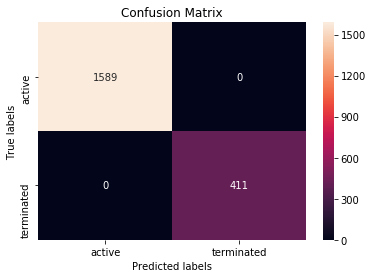

On test data 

accuracy:     1.0 
sensitivity:  1.0 
specifity:    1.0


In [14]:
y_pred = classifier.predict_classes(X_test)
classification_metrics(actual = Y_test, pred = y_pred, msg = "On test data")